In [1]:
import numpy as np
import sympy as sym
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import solve_ivp

In [2]:
#Initial orbital elements and position vector
a_i = 1;
mu = 1;
e_i = 0.5;
i_i = 45 * np.pi/180;
omega_i = 0;
w_i = 0;
w_per = 0.01;
M_i = 0;
E_0 = M_i;
g = 1;
while np.abs(g) > 1e-10:
    g = E_0 - e_i*np.sin(E_0) - M_i;
    dg_dE = 1 - e_i*np.cos(E_0);
    E_i = E_0 - g/dg_dE;
    E_0 = E_i;
print('E_i ='), print(E_i)
H_am_i = (mu*a_i*(1-e_i**2))**0.5;
print('H_am_i ='), print(H_am_i)
r_P_i = a_i*(1-e_i);
print('r_P_i ='), print(r_P_i)
f_i = 2*math.atan(((1+e_i)/(1-e_i))**0.5 * np.tan(E_i/2));
print('f_i ='), print(f_i)
theta_i = w_i + f_i;
print('theta_i ='), print(theta_i)
R_i = (H_am_i**2/mu)/(1 + e_i*np.cos(f_i));
print('R_i ='), print(R_i)
r1_i = R_i*(np.cos(theta_i)*np.cos(omega_i) - np.cos(i_i)*np.sin(omega_i)*np.sin(theta_i));
r2_i = R_i*(np.cos(theta_i)*np.sin(omega_i) + np.cos(i_i)*np.cos(omega_i)*np.sin(theta_i));
r3_i = R_i*(np.sin(i_i)*np.sin(theta_i));
r_i = np.array([r1_i,r2_i,r3_i]);
print('r_i ='), print(r_i)
v1_i = (-mu/H_am_i)*(np.cos(omega_i)*(np.sin(theta_i) + e_i*np.sin(w_i)) + np.sin(omega_i)*(np.cos(theta_i) + e_i*np.cos(w_i))*np.cos(i_i));
v2_i = (-mu/H_am_i)*(np.sin(omega_i)*(np.sin(theta_i) + e_i*np.sin(w_i)) - np.cos(omega_i)*(np.cos(theta_i) + e_i*np.cos(w_i))*np.cos(i_i));
v3_i = (mu/H_am_i)*((np.cos(theta_i) + e_i*np.cos(w_i))*np.sin(i_i));
v_i = np.array([v1_i,v2_i,v3_i]);
print('v_i ='), print(v_i)
V_i = np.linalg.norm(v_i);
print('V_i ='), print(V_i)
L_0 = np.sqrt(mu*a_i);
print('L_0 ='), print(L_0)
G_0 = L_0*np.sqrt(1 - e_i**2);
print('G_0 ='), print(G_0)
H_0 = G_0*np.cos(i_i);
print('H_0 ='), print(H_0)

E_i =
0.0
H_am_i =
0.8660254037844386
r_P_i =
0.5
f_i =
0.0
theta_i =
0.0
R_i =
0.49999999999999994
r_i =
[0.5 0.  0. ]
v_i =
[-0.          1.22474487  1.22474487]
V_i =
1.7320508075688776
L_0 =
1.0
G_0 =
0.8660254037844386
H_0 =
0.6123724356957946


(None, None)

[[-0.42796725  0.61078166  0.61078166]
 [-1.20572535  0.433857    0.433857  ]
 [-1.49554368  0.05774767  0.05774767]
 [-1.33475969 -0.33718111 -0.33718111]
 [-0.70082726 -0.59989637 -0.59989637]
 [ 0.3574806  -0.3150756  -0.3150756 ]
 [-0.11806737  0.56594859  0.56594859]
 [-1.03762003  0.51634462  0.51634462]
 [-1.45981365  0.17185506  0.17185506]
 [-1.42617025 -0.2309291  -0.2309291 ]
 [-0.93185305 -0.55232563 -0.55232563]
 [ 0.05515839 -0.5093375  -0.5093375 ]
 [ 0.20515349  0.43420555  0.43420555]
 [-0.82880016  0.57832423  0.57832423]
 [-1.38792909  0.2816793   0.2816793 ]
 [-1.48102771 -0.11871914 -0.11871914]
 [-1.12138687 -0.47979619 -0.47979619]
 [-0.26717547 -0.59554368 -0.59554368]
 [ 0.45634735  0.17895503  0.17895503]
 [-0.57804329  0.61050468  0.61050468]
 [-1.27904075  0.38394116  0.38394116]
 [-1.4999826  -0.00361356 -0.00361356]
 [-1.27097821 -0.38999646 -0.38999646]
 [-0.5609767  -0.61123294 -0.61123294]
 [ 0.4657497  -0.15889563 -0.15889563]
 [-0.28659851  0.59826618

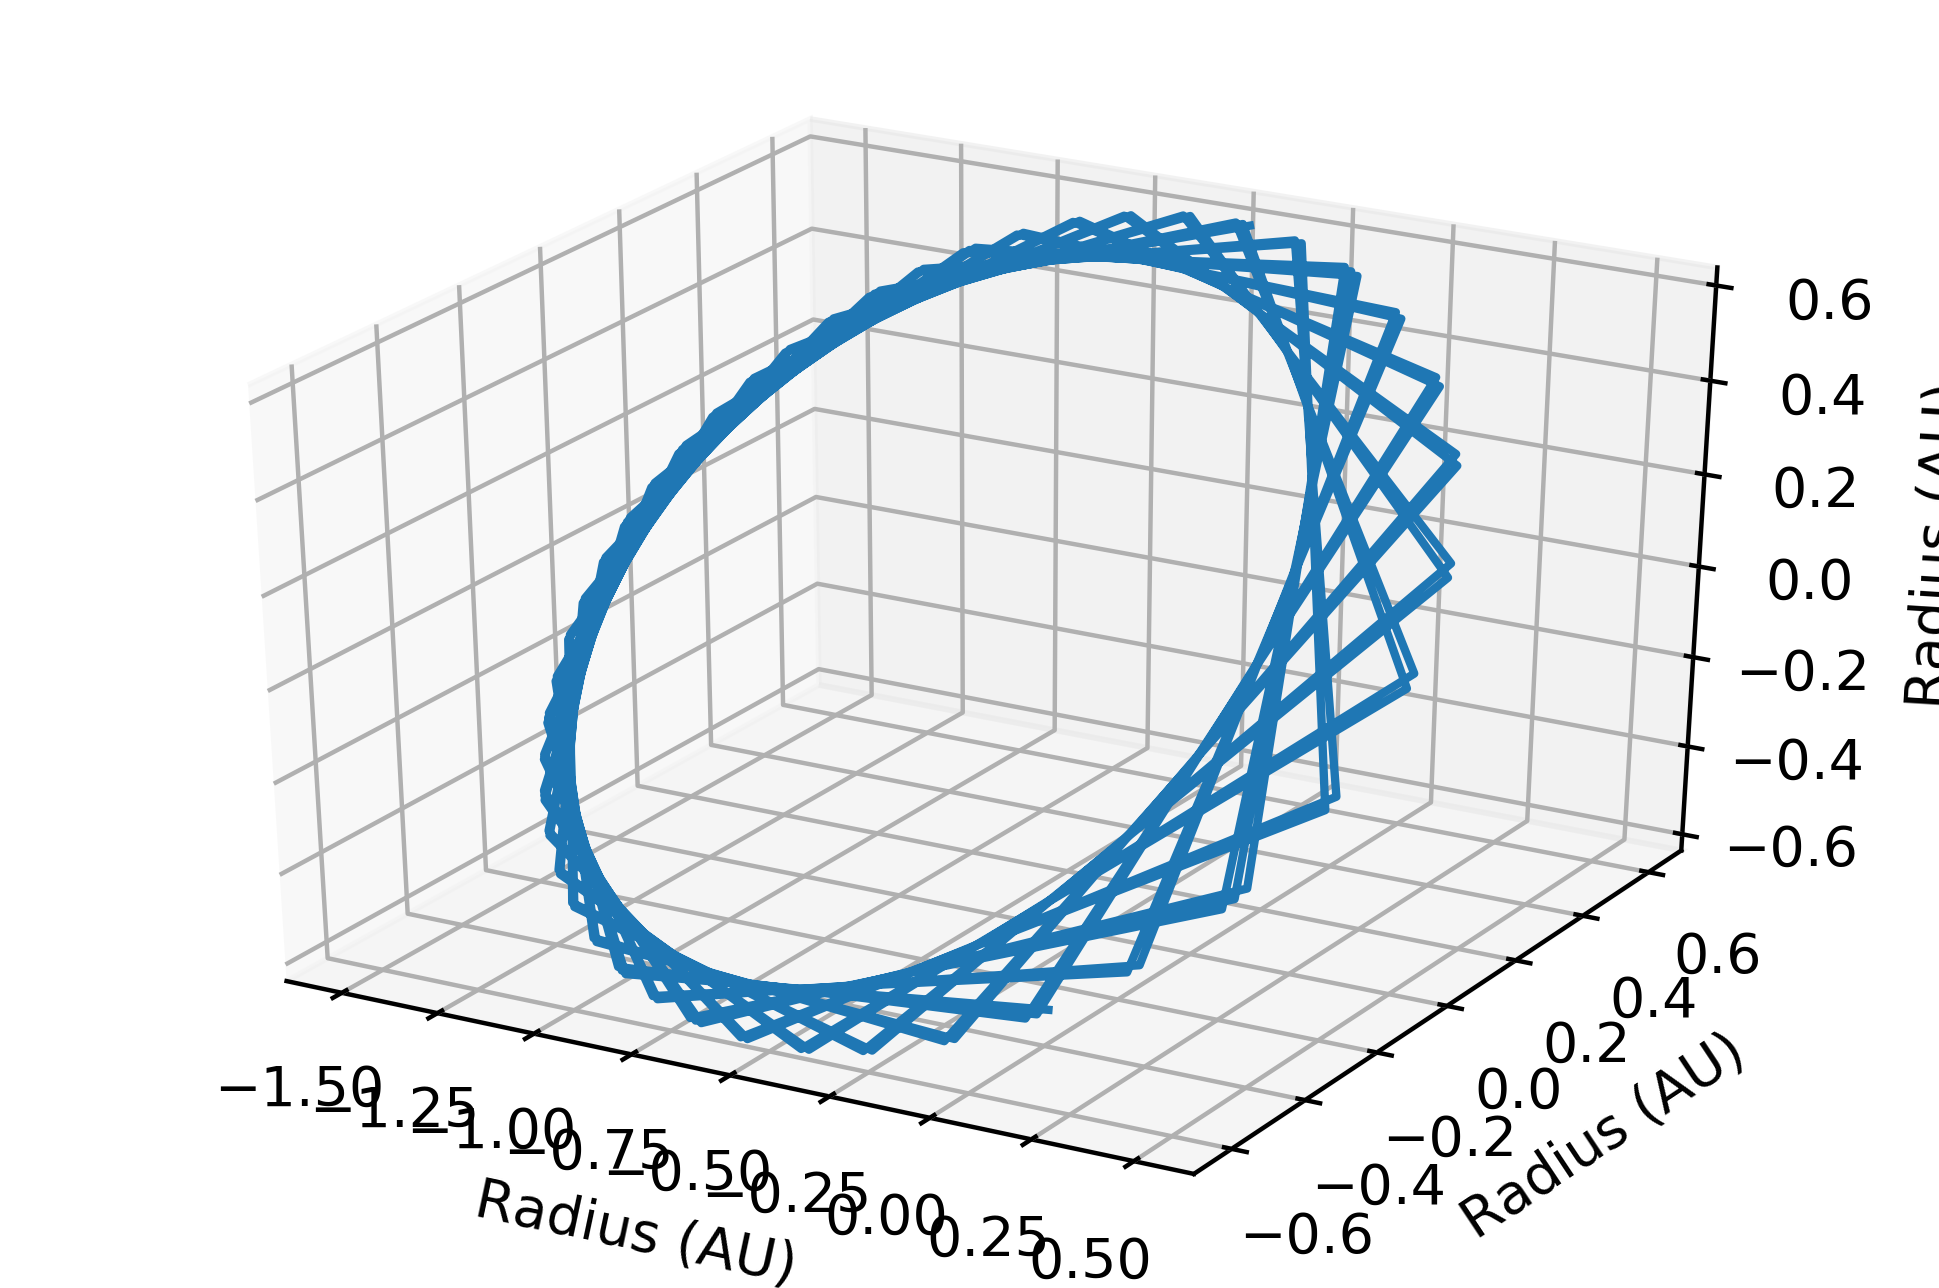

In [3]:
#Plotting for 100 Time Units
rows = 100;
rows_range = np.arange(100);
columns = 3;
columns_range = np.arange(3);
r_iter = np.zeros((rows,columns));
v_iter = np.zeros((rows,columns));
t_iter = 1;
row = 0;
Tol = 1.0E-8; #Tolerance
r = r_i;
R = R_i;
v = v_i;
V = V_i;
for i in rows_range:
    nu_r = (np.dot(r,v))/R;
    alpha = (2/R) - (V**2 / mu);
    Chi = np.sqrt(mu)*np.abs(alpha)*t_iter;
    z = alpha*Chi**2;
    if z > 0:
        C = (1 - np.cos(np.sqrt(z)))/z;
    if z < 0:
        C = (np.cosh(np.sqrt(-z)) - 1)/-z;
    if z == 0:
        C = 0.5;
    if z > 0:
        S = (np.sqrt(z) - np.sin(np.sqrt(z)))/(np.sqrt(z)**3);
    if z < 0:
        S = (np.sinh(np.sqrt(-z)) - np.sqrt(-z))/(np.sqrt(-z)**3);
    if z == 0:
        S = 1/6;
    f = ((R*nu_r)/np.sqrt(mu))*(Chi**2)*(C) + (1 - alpha*R)*(Chi**3)*(S) + (R*Chi) - np.sqrt(mu)*t_iter;
    fprime = ((R*nu_r)/np.sqrt(mu))*Chi*(1 - alpha*(Chi**2)*S) + (1 - alpha*R)*(Chi**2)*C + R;
    Ratio = f/fprime;
    while np.abs(Ratio) >= Tol:
        Chi_i = Chi - Ratio;
        z = alpha*Chi_i**2;
        if z > 0:
            C = (1 - np.cos(np.sqrt(z)))/z;
        if z < 0:
            C = (np.cosh(np.sqrt(-z)) - 1)/-z;
        if z == 0:
            C = 0.5;
        if z > 0:
            S = (np.sqrt(z) - np.sin(np.sqrt(z)))/(np.sqrt(z)**3);
        if z < 0:
            S = (np.sinh(np.sqrt(-z)) - np.sqrt(-z))/(np.sqrt(-z)**3);
        if z == 0:
            S = 1/6;
        f = ((R*nu_r)/np.sqrt(mu))*(Chi_i**2)*(C) + (1 - alpha*R)*(Chi_i**3)*(S) + (R*Chi_i) - np.sqrt(mu)*t_iter;
        fprime = ((R*nu_r)/np.sqrt(mu))*Chi_i*(1 - alpha*(Chi_i**2)*S) + (1 - alpha*R)*(Chi_i**2)*C + R;
        Ratio = f/fprime;
        Chi = Chi_i;
    f_func = 1 - ((Chi**2)/R)*C;
    g_func = t_iter - (1/np.sqrt(mu))*(Chi**3)*S;
    r_next = f_func*r + g_func*v;
    R_next = np.sqrt(np.dot(r_next,r_next));
    fdot = (np.sqrt(mu)/(R*R_next))*(alpha*(Chi**3)*S - Chi);
    gdot = 1 - ((Chi**2)/R_next)*C;
    v_next = fdot*r + gdot*v;
    V_next = np.sqrt(np.dot(v_next,v_next));
    r_iter[row][:] = r_next;
    v_iter[row][:] = v_next;
    r = r_next;
    R = R_next;
    v = v_next;
    V = V_next;
    row += 1;
print(r_iter)
fig = plt.figure(dpi=400)
ax = plt.axes(projection='3d')
ax.plot3D(r_iter[:,0],r_iter[:,1],r_iter[:,2])
ax.set_xlabel('Radius (AU)')
ax.set_ylabel('Radius (AU)')
ax.set_zlabel('Radius (AU)')
plt.savefig('orbit.png')